# Exoplanet Hunting in Deep Space with Neural networks



In [1]:
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Exoplanet hunting/exoTrain.csv')
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Exoplanet hunting/exoTest.csv')
df_test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [4]:
X_train = df_train.drop(columns=['LABEL'], axis=1)
y_train = df_train['LABEL']

X_test = df_test.drop(columns=['LABEL'], axis=1)
y_test = df_test['LABEL']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5087, 3197), (5087,), (570, 3197), (570,))

In [5]:
def change_label(y_train, y_test):

    """
    Changing the Label 1 (Non_exoplanet_star) to 0 and Label 2 (Exopanet_start) to 1
    1 --> 0
    2 --> 1
    """
    
    label = lambda x: 1 if x == 2 else 0

    y_train_01, y_test_01 = y_train.apply(label), y_test.apply(label)

    return y_train_01, y_test_01

y_train, y_test = change_label(y_train, y_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5087, 3197), (5087,), (570, 3197), (570,))

In [7]:
def smote(x_train, y_train):

    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline
    
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.3)

    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train)

    return x_train_res, y_train_res

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5087, 3197), (5087,), (570, 3197), (570,))

In [9]:
x_test = X_test
x_train, y_train = smote(X_train, y_train)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4376, 3197), (4376,), (570, 3197), (570,))

In [ ]:
def neural_networks_model(model, X_test, y_test):

    print('Evaluating the model')
    model.evaluate(x_test, y_test)

    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    
    y_pred = model.predict(x_test)

    # Diplay Classification report
    print(classification_report(y_test, tf.round(y_pred)))

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred))
    disp.plot
    plt.show()

In [ ]:
x_train.shape, y_train.shape

((4376, 3197), (4376,))

## Model 1

In [12]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    Dense(100, activation='relu', kernel_initializer='uniform'),
    Dense(100, activation='relu', kernel_initializer='uniform'),
    Dense(50, activation='relu', kernel_initializer='uniform'),
    Dense(10, activation='relu', kernel_initializer='uniform'),
    Dense(1, activation='sigmoid')    
])

model_1.compile(
        loss=tf.keras.losses.BinaryCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
)

history_1 = model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
137/137 [==============================] - 3s 4ms/step - loss: 1.6333 - accuracy: 0.8352
Epoch 2/10
137/137 [==============================] - 1s 4ms/step - loss: 0.6215 - accuracy: 0.9561
Epoch 3/10
137/137 [==============================] - 1s 4ms/step - loss: 1.4025 - accuracy: 0.9449
Epoch 4/10
137/137 [==============================] - 1s 4ms/step - loss: 0.1175 - accuracy: 0.9783
Epoch 5/10
137/137 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.9879
Epoch 6/10
137/137 [==============================] - 1s 4ms/step - loss: 0.3263 - accuracy: 0.9561
Epoch 7/10
137/137 [==============================] - 1s 4ms/step - loss: 0.1327 - accuracy: 0.9707
Epoch 8/10
137/137 [==============================] - 1s 4ms/step - loss: 0.1546 - accuracy: 0.9776
Epoch 9/10
137/137 [==============================] - 1s 4ms/step - loss: 1.1545 - accuracy: 0.9641
Epoch 10/10
137/137 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9865

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               319800    
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 335,471
Trainable params: 335,471
Non-trainable params: 0
_________________________________________________________________


Evaluating the model
18/18 [==============================] - 0s 4ms/step - loss: 1.6493 - accuracy: 0.9895
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.40      0.40      0.40         5

    accuracy                           0.99       570
   macro avg       0.70      0.70      0.70       570
weighted avg       0.99      0.99      0.99       570



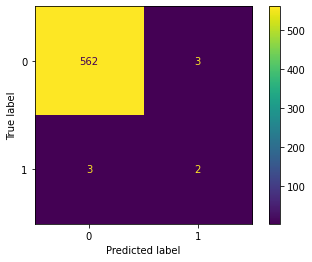

In [ ]:
neural_networks_model(model_1, x_test, y_test)

As the data is highly imabalanced its not a good idea to evaluate the model based on only classification report. Confusion Matrix plays an important role in this scenario. Here it says out of 5 it has detected 2 correcly and the rest 3 incorrectly. 

## Model 2

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten

model_2 = tf.keras.Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(3197,1)),
    Conv1D(64, 3, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs=10)

Epoch 1/10
137/137 [==============================] - 13s 27ms/step - loss: 1.0921 - accuracy: 0.7319
Epoch 2/10
137/137 [==============================] - 3s 22ms/step - loss: 0.8386 - accuracy: 0.7568
Epoch 3/10
137/137 [==============================] - 3s 22ms/step - loss: 0.6608 - accuracy: 0.7628
Epoch 4/10
137/137 [==============================] - 3s 25ms/step - loss: 0.6729 - accuracy: 0.7622
Epoch 5/10
137/137 [==============================] - 3s 22ms/step - loss: 0.6090 - accuracy: 0.7616
Epoch 6/10
137/137 [==============================] - 3s 22ms/step - loss: 0.6030 - accuracy: 0.7631
Epoch 7/10
137/137 [==============================] - 3s 22ms/step - loss: 0.5734 - accuracy: 0.7642
Epoch 8/10
137/137 [==============================] - 3s 22ms/step - loss: 0.5525 - accuracy: 0.7662
Epoch 9/10
137/137 [==============================] - 3s 22ms/step - loss: 0.5412 - accuracy: 0.7678
Epoch 10/10
137/137 [==============================] - 3s 22ms/step - loss: 0.5212 - accur

In [ ]:
model_2.evaluate(x_test, y_test)

18/18 [==============================] - 0s 15ms/step - loss: 0.2662 - accuracy: 0.9910


[0.2662454843521118, 0.9910352230072021]

In [ ]:
y_pred_2 = model_2.predict(x_test)
y_pred_2 = tf.squeeze(y_pred_2)
y_pred_2 = tf.reduce_mean(y_pred_2, 1)

In [ ]:
y_pred_2.shape

TensorShape([570])

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, tf.round(y_pred_2)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


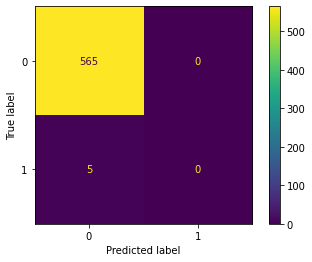

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_2))
disp.plot
plt.show()

In [ ]:
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# accuracy = accuracy_score(y_test, y_class_pred)
# balanced_accuracy = balanced_accuracy_score(y_test, y_class_pred)
# precision = precision_score(y_test, y_class_pred)
# recall = recall_score(y_test, y_class_pred)
# f1 = f1_score(y_test, y_class_pred)
# auc = roc_auc_score(y_test, y_pred)

## Model 3

In [ ]:
model_3 = tf.keras.Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(3197,1)),
    Conv1D(100, 2, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs=10)

Epoch 1/10
137/137 [==============================] - 6s 35ms/step - loss: 387.2547 - accuracy: 0.7852
Epoch 2/10
137/137 [==============================] - 5s 34ms/step - loss: 76.5482 - accuracy: 0.7861
Epoch 3/10
137/137 [==============================] - 5s 35ms/step - loss: 0.3095 - accuracy: 0.7731
Epoch 4/10
137/137 [==============================] - 5s 35ms/step - loss: 0.2660 - accuracy: 0.7861
Epoch 5/10
137/137 [==============================] - 5s 35ms/step - loss: 0.3796 - accuracy: 0.7509
Epoch 6/10
137/137 [==============================] - 5s 35ms/step - loss: 0.3264 - accuracy: 0.7749
Epoch 7/10
137/137 [==============================] - 5s 35ms/step - loss: 0.2545 - accuracy: 0.8332
Epoch 8/10
137/137 [==============================] - 5s 34ms/step - loss: 0.2580 - accuracy: 0.8558
Epoch 9/10
137/137 [==============================] - 5s 38ms/step - loss: 0.2248 - accuracy: 0.9017
Epoch 10/10
137/137 [==============================] - 6s 44ms/step - loss: 0.2964 - acc

In [ ]:
model_3.evaluate(x_test, y_test)

18/18 [==============================] - 0s 14ms/step - loss: 0.0823 - accuracy: 0.9035


[0.082315593957901, 0.9035087823867798]

In [ ]:
y_pred_3 = model_3.predict(x_test)
y_pred_3.shape

(570, 1)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, tf.round(y_pred_3)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       565
           1       0.08      1.00      0.15         5

    accuracy                           0.90       570
   macro avg       0.54      0.95      0.55       570
weighted avg       0.99      0.90      0.94       570



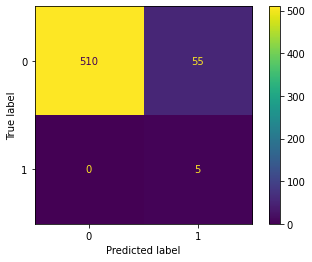

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_3))
disp.plot
plt.show()

## Model 4

In [ ]:
from tensorflow.keras.layers import MaxPooling1D

model_4 = tf.keras.Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(3197,1)),
    Conv1D(100, 2, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(x_train, y_train, epochs=10)

Epoch 1/10
137/137 [==============================] - 5s 30ms/step - loss: 38.8229 - accuracy: 0.9063
Epoch 2/10
137/137 [==============================] - 4s 29ms/step - loss: 51.1428 - accuracy: 0.8899
Epoch 3/10
137/137 [==============================] - 4s 29ms/step - loss: 3.2617 - accuracy: 0.9655
Epoch 4/10
137/137 [==============================] - 4s 29ms/step - loss: 14.3159 - accuracy: 0.9703
Epoch 5/10
137/137 [==============================] - 4s 29ms/step - loss: 4.6454 - accuracy: 0.9728
Epoch 6/10
137/137 [==============================] - 5s 35ms/step - loss: 1.1607 - accuracy: 0.9920
Epoch 7/10
137/137 [==============================] - 5s 36ms/step - loss: 2.2701 - accuracy: 0.9888
Epoch 8/10
137/137 [==============================] - 4s 29ms/step - loss: 0.4192 - accuracy: 0.9959
Epoch 9/10
137/137 [==============================] - 4s 29ms/step - loss: 0.5829 - accuracy: 0.9947
Epoch 10/10
137/137 [==============================] - 4s 29ms/step - loss: 0.2297 - acc

In [ ]:
model_4.evaluate(x_test, y_test)

18/18 [==============================] - 0s 15ms/step - loss: 0.6232 - accuracy: 0.9930


[0.6231833696365356, 0.9929824471473694]

In [ ]:
y_pred_4 = model_4.predict(x_test)
y_pred_4.shape

(570, 1)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, tf.round(y_pred_4)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570



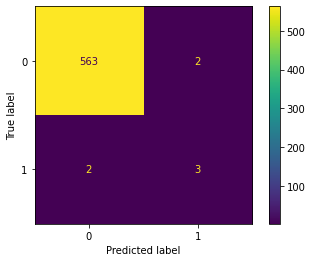

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_4))
disp.plot
plt.show()

## Model 5

In [287]:
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.layers import MaxPooling1D

model_5 = tf.keras.Sequential([
    Conv1D(100, 2, activation='relu', input_shape=(3197,1)),
    Conv1D(100, 2, activation='relu'),
    Conv1D(50, 2, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(x_train, 
                        y_train, 
                        validation_split=0.2, 
                        batch_size=64, 
                        epochs=10)

Epoch 1/10
55/55 [==============================] - 11s 154ms/step - loss: 4.6832 - accuracy: 0.9320 - val_loss: 8.0488 - val_accuracy: 0.1963
Epoch 2/10
55/55 [==============================] - 8s 140ms/step - loss: 4.2927 - accuracy: 0.9609 - val_loss: 2.5893 - val_accuracy: 0.3687
Epoch 3/10
55/55 [==============================] - 8s 140ms/step - loss: 0.7005 - accuracy: 0.9640 - val_loss: 2.5241 - val_accuracy: 0.3824
Epoch 4/10
55/55 [==============================] - 8s 144ms/step - loss: 0.3977 - accuracy: 0.9814 - val_loss: 0.4018 - val_accuracy: 0.8208
Epoch 5/10
55/55 [==============================] - 8s 140ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.1233 - val_accuracy: 0.9532
Epoch 6/10
55/55 [==============================] - 7s 134ms/step - loss: 0.1717 - accuracy: 0.9940 - val_loss: 0.2383 - val_accuracy: 0.9635
Epoch 7/10
55/55 [==============================] - 7s 134ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.1551 - val_accuracy: 0.9543
Epoch

In [288]:
model_5.evaluate(x_test, y_test)

18/18 [==============================] - 0s 27ms/step - loss: 0.2987 - accuracy: 0.9930


[0.29867902398109436, 0.9929824471473694]

In [289]:
y_pred_5 = model_5.predict(x_test)
y_pred_5.shape

(570, 1)

In [290]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, tf.round(y_pred_5)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       565
           1       0.57      0.80      0.67         5

    accuracy                           0.99       570
   macro avg       0.78      0.90      0.83       570
weighted avg       0.99      0.99      0.99       570



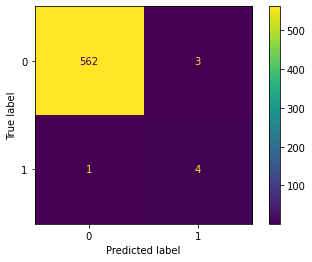

In [291]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_5))
disp.plot
plt.show()

In [292]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """ 
    import matplotlib.pyplot as plt
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

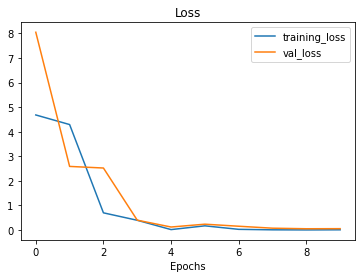

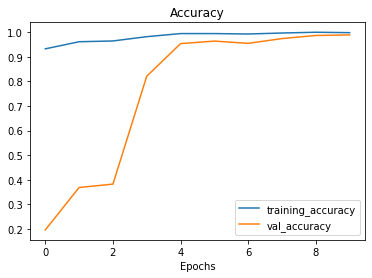

In [293]:
plot_loss_curves(history_5)